https://www.alpha-i.co/blog/MNIST-for-ML-beginners-The-Bayesian-Way.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from edward.models import Categorical, Normal
import edward as ed
import pandas as pd
import pickle
ed.set_seed(314159)

In [37]:
theo100 = pd.read_table("theo100.txt",sep="\t")
theo25 = pd.read_table("theo25.txt",sep="\t")
theo50= pd.read_table("theo50.txt",sep="\t")
theo85 = pd.read_table("theo85.txt",sep="\t")
theo35 = pd.read_table("theo35.txt",sep="\t")

In [59]:
theo100beta = theo100["beta0"][10:1000]
theo85beta = theo85["beta0"][10:1000]
theo50beta = theo50["beta0"][10:1000]
theo35beta = theo35["beta0"][10:1000]
theo25beta = theo25["beta0"][10:1000]

theo100gamma = theo100["gamma0"][10:1000]
theo85gamma = theo85["gamma0"][10:1000]
theo50gamma = theo50["gamma0"][10:1000]
theo35gamma = theo35["gamma0"][10:1000]
theo25gamma = theo25["gamma0"][10:1000]

theo100delta = theo100["delta0"][10:1000]
theo85delta = theo85["delta0"][10:1000]
theo50delta = theo50["delta0"][10:1000]
theo35delta = theo35["delta0"][10:1000]
theo25delta = theo25["delta0"][10:1000]

In [60]:
iter100 = theo100["iterations"][10:1000]
iter85 = theo85["iterations"][10:1000]
iter50 = theo50["iterations"][10:1000]
iter35 = theo35["iterations"][10:1000]
iter25 = theo25["iterations"][10:1000]

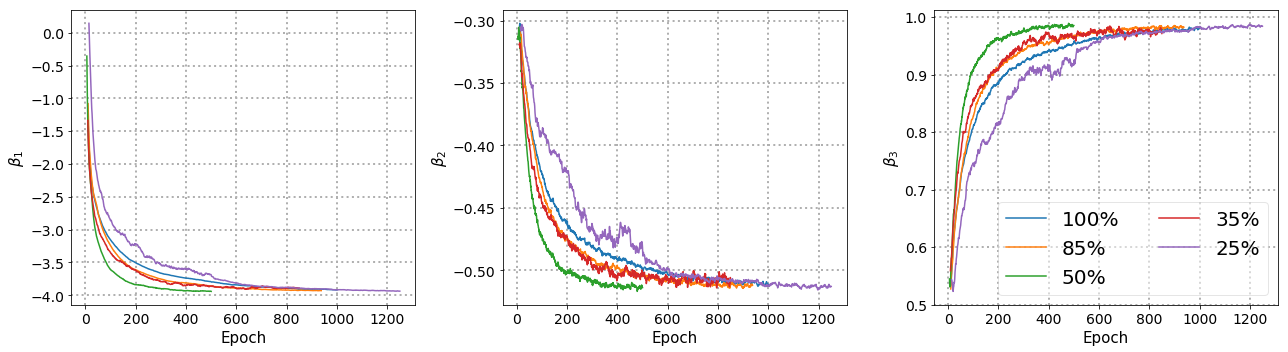

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(iter100, theo100beta, label='100%')
plt.plot(iter85, theo85beta, label='85%')
plt.plot(iter50, theo50beta, label='50%')
plt.plot(iter35, theo35beta, label='35%')
plt.plot(iter25, theo25beta, label='25%')

leg.get_frame().set_alpha(0.5)
plt.xticks(fontsize=14)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel(r'$\beta_1$', fontsize=15)
plt.yticks(fontsize=14)
plt.grid(linestyle='dotted',linewidth=2)

plt.subplot(1, 3, 2)
plt.plot(iter100, theo100gamma, label='100%')
plt.plot(iter85, theo85gamma, label='85%')
plt.plot(iter50, theo50gamma, label='50%')
plt.plot(iter35, theo35gamma, label='35%')
plt.plot(iter25, theo25gamma, label='25%')

leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel(r'$\beta_2$', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linestyle='dotted',linewidth=2)


plt.subplot(1, 3, 3)
plt.plot(iter100, theo100delta, label='100%')
plt.plot(iter85, theo85delta, label='85%')
plt.plot(iter50, theo50delta, label='50%')
plt.plot(iter35, theo35delta, label='35%')
plt.plot(iter25, theo25delta, label='25%')

leg = plt.legend(fontsize=20,fancybox=True, loc="lower right",ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel(r'$\beta_3$', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linestyle='dotted',linewidth=2)


fig.tight_layout()
plt.show()

In [69]:
fig.savefig("mcem.png",bbox_inches = 'tight')

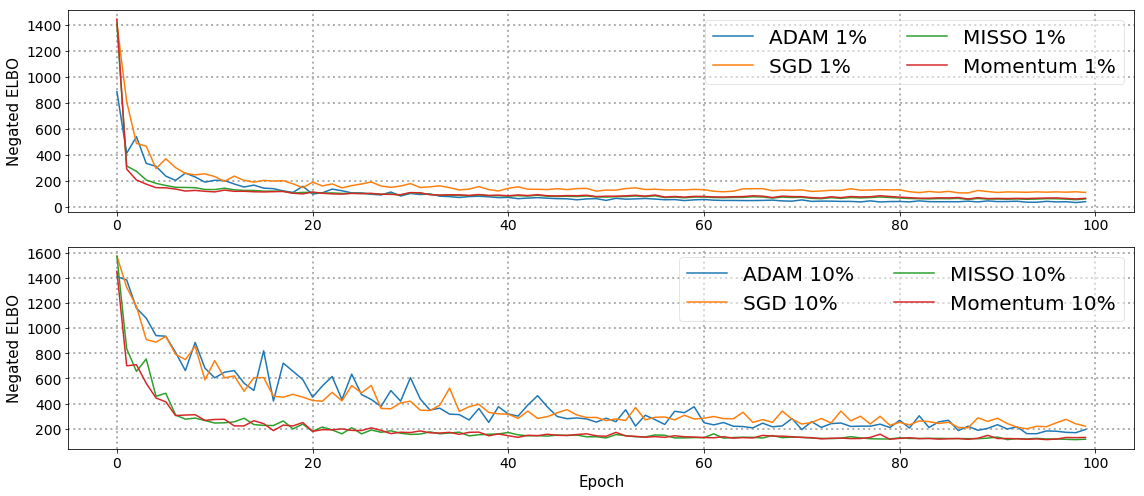

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.plot(np.arange(100), adamsb / len(X_batch), label='ADAM 1%')
plt.plot(np.arange(100), sgdsb / len(X_batch), label='SGD 1%')
plt.plot(np.arange(100), sagsb / len(X_batch), label='MISSO 1%')
plt.plot(np.arange(100), momentsb / len(X_batch), label='Momentum 1%')
leg = plt.legend(fontsize=20,fancybox=True, loc=1,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xticks(fontsize=14)
plt.ylabel('Negated ELBO', fontsize=15)
plt.yticks(fontsize=14)
plt.grid(linestyle='dotted',linewidth=2)

plt.subplot(2, 1, 2)
plt.plot(np.arange(100), adam / len(X_batch), label='ADAM 10%')
plt.plot(np.arange(100), sgd / len(X_batch), label='SGD 10%')
plt.plot(np.arange(100), sag / len(X_batch), label='MISSO 10%')
plt.plot(np.arange(100), moment / len(X_batch), label='Momentum 10%')

leg = plt.legend(fontsize=20,fancybox=True, loc=1,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Negated ELBO', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [36]:
fig.savefig("bnn.png",bbox_inches = 'tight')

### Comparison batch size